In [28]:
import pandas as pd
df = pd.read_csv('../data/final_df_points_18_21_class.csv')

In [29]:
df = df.sort_values('dt_start').reset_index(drop=True)

In [30]:
df.tail()

,bike_id,lat,lng,dt_start,dt_end,hex_id,in_zone,zone_name,end_station_number,temp,...,month,day,start_min,over_night,idle_time_next_day,idle_time,idle_time_class,on_station,hex_enc,zone_name_enc
2375898,72058,51.317569,12.382730,1640897593,1640904368,881f1a1609fffff,1,Blaue Zone Leipzig Ost 0€,0,13.19,...,12,3,1253,0,0,112,2,0,98,1
2375899,71949,51.334711,12.356763,1640897835,1640899343,881f1a1649fffff,1,Pinke Zone Leipzig Ost 1€,0,13.19,...,12,3,1257,0,0,25,1,0,126,3
2375900,97785,51.367276,12.369792,1640898086,1640900985,881f1a8c8bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.05,...,12,3,1261,0,0,48,1,0,261,1
2375901,41738,51.366942,12.370322,1640900918,1640903516,881f1a8c8bfffff,1,Pinke Zone Leipzig Ost 1€,0,13.05,...,12,3,1309,0,0,43,1,0,261,3
2375902,72028,51.332844,12.404319,1640903200,1640905163,881f1a165bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.11,...,12,3,1347,0,0,32,1,0,134,1


In [31]:
import numpy as np

tsdata = pd.DataFrame({ 'date': [1,2,3,4,5,6,7,8,9,10,11,12], 'bike_count': 0})
tsdata = tsdata.set_index('date')
tsdata.head()

,bike_count
date,
1,0
2,0
3,0
4,0
5,0


In [32]:
from matplotlib import pyplot as plt
import statistics
from tqdm import tqdm
df['time_start'] = pd.to_datetime(df['dt_start'],unit='s')

def count(year):
    for ind in tqdm(df.index):
        if df['time_start'][ind].year == year:
            tsdata['bike_count'][df['time_start'][ind].month] += 1
    return tsdata

def plot(year,tsdata):
    fig, ax = plt.subplots()
    # plotting monthly data
    ax.plot(tsdata)
    ax.set_xlabel('month')
    ax.set_ylabel('rentals')
    # show values
    ax.set_title(f'Rentals from year {year}')
    plt.show()


100%|██████████| 2375903/2375903 [00:41<00:00, 56901.03it/s] 


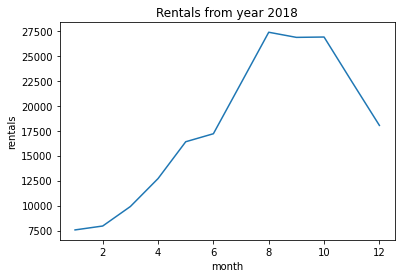

100%|██████████| 2375903/2375903 [01:18<00:00, 30092.53it/s] 


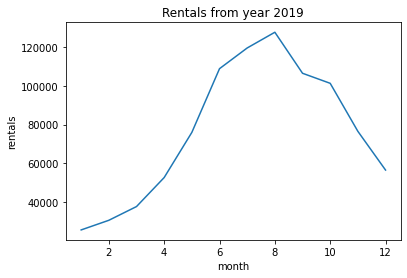

100%|██████████| 2375903/2375903 [01:20<00:00, 29661.78it/s] 


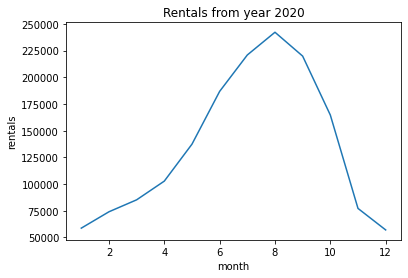

100%|██████████| 2375903/2375903 [01:26<00:00, 27352.23it/s] 


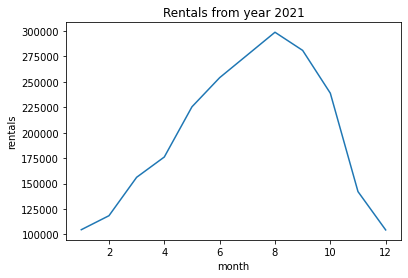

In [33]:
for year in [2018,2019,2020,2021]:
    tsdata = count(year)
    plot(year,tsdata)